# Plotly 활용해서 그래프를 그리는 대표적인 방법

## 1. graph_objects 모듈을 활용한 생성

* 그래프를 하나하나 설명하고 직접 지정하여 제작하는 방법

* [Reference](https://plotly.com/python/reference/)

In [ ]:
#!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
import plotly.graph_objects as go

# Figure를 통해 기본 그래프를 생성
fig = go.Figure(
    # Data 입력
    data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])],
    # layout 입력
    layout=go.Layout(
        title=go.layout.Title(text='A Figure By a Grapht Objects')
    )
)

# 그래프 그리기 (Figure 렌더링)
fig.show()

In [ ]:
'''
# data : Trace라고 불리오는 그리고자 하는 그래프의 타입(ex. Bar, Scatter, Line, Box, ..)과
         그 그래프에 시각화 하고자하는 Raw 데이터를 품고 있는 단위
       : Trace를 Pythoh list 형태로 받는게 기본.

# layout : data 외 모든 부분을 편집, 가공하는 부분
         : Title, legend, Colors, Hover-level, Axes, Shape 등 그래프 시각화 질을 높이기 위한 다양한 도구를 지정
'''

## 2. express 모듈을 활용한 그래프 생성

* 이미 제작되어 있는 템플릿으로 빠르게 제작하는 방법

* [Reference](https://plotly.com/python-api-reference/plotly.express.html)

In [ ]:
import plotly.express as px

fig = px.bar(x=['a', 'b', 'c'], y=[1, 2, 3], title='A Figure By Express Module')

fig.show()

### 장단점

<table>
  <tr>
    <th></th>
    <th>장점</th>
    <th>단점</th>
  </tr>
  <tr>
    <td>graph_objects</td>
    <td>세세하게 그래프 구성 가능</td>
    <td>가독성이 떨어지고 학습에 부담</td>
  </tr>
    <tr>
    <td>express</td>
    <td>가독성이 좋고 쉽게 표현 가능</td>
    <td>템플릿에 종속, 세세한 표현이 필요하면 graph_objects와 같이 사용해야 함</td>
  </tr>
</table>
  
---

* graph_objects : 논문, 발표 자료와 같이 그래프 visulization에 중점을 두어야 할 경우 추천

* express : 사용자가 빠르게 데이터 흐름, 분석을 수행하고자 할 때 추천




## 3. 그래프 업데이트

* 그래프를 그리는 보편적 방법은 기초 그래프를 생성한 후 다양한 방법으로 그래프를 업데이트 처리하는 방식

* 일종의 그래프 튜닝 과정

### **[add_trace]**

* Figure에 새로운 Trace를 추가

In [2]:
# 1) 비어있는 Figure에 Trace를 추가

import plotly.graph_objects as go

fig = go.Figure()

# 추가
fig.add_trace(go.Bar(x=[1, 2, 3], y=[1, 3, 2]))

fig.show()

In [9]:
# 2) 이미 Trace가 있는 Figure에 다른 Trace를 추가하여 그리기
import plotly.express as px

# 데이터 로딩
df = px.data.iris()

# express 모듈로 scatter plot 생성
fig =px.scatter(data_frame=df, x='sepal_width', y='sepal_length', color='species',
                title='express figure에 trace 추가')

# Trace 추가 (직선 그래프)
fig.add_trace(
    go.Scatter(
      x = [2, 4],
      y = [4, 8],
      mode = 'lines',
      line = go.scatter.Line(color='gray'),
      showlegend=False
    )
)

fig.show()

### **[update_traces()]**

* 이미 생성된 trace의 type, color, style, template 등 추가 편집이 필요할 때

* 한번에 모든 Trace의 스타일 업데이트가 가능 -> 코드의 길이를 줄일 수 있음.

In [16]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

# Trace 추가
fig.add_scatter(y=[4, 2, 3.5], mode='markers', marker=dict(size=20, color='LightSeaGreen'),
                name='a', row=1, col=1)

fig.add_bar(y=[2, 1, 3], marker=dict(color='MediumPurple'), name='b', row=1, col=1)

fig.add_scatter(y=[2, 3.4, 4], mode='markers', marker=dict(size=20, color='MediumPurple'),
                name='c', row=1, col=2)

fig.add_bar(y=[1, 3, 2], marker=dict(color='LightSeaGreen'),
            name='d', row=1, col=2)

# 한 번에 bar plot만 blue로 변경
fig.update_traces(marker=dict(color='RoyalBlue'),
                  selector=dict(type='bar'))

fig.show()

### **[update_layout()]**

* Trace 외적인 그래프 요소(ex. 그래프 사이즈, 제목 및 텍스트, 글꼴크기 등) 를 업데이트 가능

In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(x=[1, 2, 3], y=[1, 3, 2]))

# layout 추가
fig.update_layout(title_text="update를 통한 새로운 타이틀", title_font_size=30)

fig.show()

### **[update_xaxes() | update_yaxex()]**

* 각각 X축, Y축에 관한 다양한 편집이 가능

In [21]:
import plotly.graph_objects as go
import plotly.express as px

# 데이터 로딩
df = px.data.tips()
x = df.total_bill
y = df.tip

# 그래프 그리기
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))

# 축 타이틀 추가
fig.update_xaxes(title_text='Total Bill($)')
fig.update_yaxes(title_text='Tip ($)')

fig.show()

## 4. Colormap 사용

### 1) 불연속 데이터용 colormap

* 색을 연속적인 그라데이션의 묶음으로 구분하지 않은 색의 모음

* 주로 Bar 차트와 같은 범주형 데이터나 label이 필요한 구분에 유용


In [22]:
fig = px.colors.qualitative.swatches()

fig.show()

In [31]:
# 데이터 로딩
df = px.data.gapminder().query('year==2007')

# 그래프 그리기
fig = px.bar(df, y='continent', x='pop', color='continent',
             color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

### 2) 연속데이터용 colormap

* 수치데이터와 같은 구분이 힘든 연속형 데이터에 유용

In [23]:
fig = px.colors.sequential.swatches_continuous()

fig.show()

In [33]:
df = px.data.iris()

fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species',
                 color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

### 3) 발산데이터용 colormap

* 중간에 흰색으로 수렴을 하는 연속형 데이터에 유용

In [24]:
px.colors.diverging.swatches_continuous()

### 4) 순환데이터용 colormap

* 순환하는 시간 데이터 (시간, 요일, 계절)에 유용

In [25]:
px.colors.cyclical.swatches_cyclical()

## 5. Plotly 템플릿 활용

* 이미 완성되어 있는 스타일의 템플릿을 제공.

* 개발자(분석가)가 직접 커스터마이징한 스타일의 템플릿을 제작해서 사용할 수 있는 기능까지 제공

**[제공되는 탬플릿]**

In [34]:
import plotly.io as pio

pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [35]:
df = px.data.gapminder().query('year==2007')

list1 = ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark', 'presentation', 'none']

for template in list1:
  fig = px.scatter(df,
                   x='gdpPercap', y='lifeExp', size='pop', color='continent',
                   log_x=True, size_max=60,
                   template=template, title=f'GapMinder 2007 : {template} theme')

  fig.show()



---

# 템플릿 적용

## 1) 기본 템플릿으로 적용

    import plotly.io as pio
    pio.template.default = '<template>'

## 2) express 에서 템플릿 지정
    px.scatter(template='<tempmate>')

## 3) graph_objects 에서 템플릿 지정
    update_layout(template='<template>'





---

**[직접 템플릿 제작해서 사용]**

#### 1) 워터마크 템플릿 생성




In [37]:
import plotly.graph_objects as go

watermark_template = go.layout.Template(
    layout_annotations=[
        dict(
            name='watermark_template',
            text='https://www.aicore.co.kr',
            textangle=-35,
            opacity=0.1,
            font=dict(color='black', size=50),
            xref='paper',
            yref='paper',
            x=0.5,
            y=0.5,
            showarrow=False,
        )
    ]
)

#### 2) 커스터마이징한 템플릿 적용

In [38]:
# Figure 생성
fig = go.Figure()

# Trace 생성
fig.add_trace(
    go.Scatter(
        x = [0, 1, 2, 3, 4, 5],
        y = [1.5, 1, 1.3, 0.7, 0.8, 0.9]
    )
)

# template 추가
fig.update_layout(template=watermark_template)
fig.show()

In [40]:
# express module

fig = px.scatter(df, x='gdpPercap', y='lifeExp', size='pop', color='continent', log_x=True, size_max=60)

fig.update_layout(template=watermark_template)
fig.show()

## 6. 파일로 추출하기

* kaleido 별도의 패키지가 필요


      # 일반 파이썬
      pip install -U kaleido
      # anaconda 사용자
      conda install -c conda-forge python-kaleido

In [42]:
#!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.6 MB/s eta 0:00:00


In [45]:
# kaleido 실패했을 경우
!pip uninstall kaleido

Found existing installation: kaleido 0.2.1
Uninstalling kaleido-0.2.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/kaleido-0.2.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/kaleido/*
Proceed (Y/n)? Y
  Successfully uninstalled kaleido-0.2.1


In [46]:
# conda에서 제공하는 환경을 빌려와서 설치한다
!pip install -q condacolab

In [47]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [1]:
!conda install -c conda-forge python-kaleido

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - python-kaleido


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.6.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.6.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    expat-2.6.2                |       h59595ed_0         134 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    

In [3]:
import plotly.express as px

df = px.data.gapminder().query('year==2007')

fig = px.scatter(df, x='gdpPercap', y='lifeExp', size='pop', color='continent', log_x=True, size_max=60)

#fig.update_layout(template=watermark_template)
fig.show()
fig.write_image('fig1.jpeg')

In [4]:
import plotly.express as px

df = px.data.gapminder().query('year==2007')

fig = px.scatter(df, x='gdpPercap', y='lifeExp', size='pop', color='continent', log_x=True, size_max=60)

#fig.update_layout(template=watermark_template)
fig.show()
fig.write_html('fig2.html')

## 7. Plotly를 pandas 기본 backed로 설정

    import pandas as pd
    pd.options.plotting.backend = 'plotly'

<Axes: >

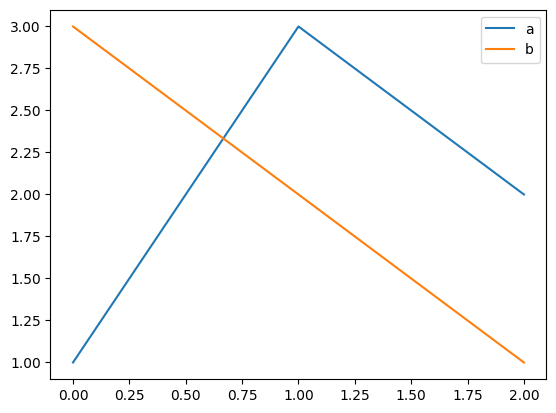

In [5]:
import pandas as pd

df = pd.DataFrame(dict(a=[1, 3, 2], b=[3, 2, 1]))

df.plot()

In [6]:
import pandas as pd
pd.options.plotting.backend = 'plotly'

In [8]:
df = pd.DataFrame(dict(a=[1, 3, 2], b=[3, 2, 1]))

fig = df.plot()

fig.show()